## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055


0:	learn: 0.9629179	total: 49ms	remaining: 49s
1:	learn: 0.9301086	total: 50.9ms	remaining: 25.4s
2:	learn: 0.9005637	total: 52.8ms	remaining: 17.5s
3:	learn: 0.8720983	total: 54.8ms	remaining: 13.6s
4:	learn: 0.8467410	total: 56.7ms	remaining: 11.3s
5:	learn: 0.8226672	total: 58.6ms	remaining: 9.7s
6:	learn: 0.7994702	total: 60.4ms	remaining: 8.57s
7:	learn: 0.7784272	total: 62.4ms	remaining: 7.73s
8:	learn: 0.7602192	total: 64.3ms	remaining: 7.08s
9:	learn: 0.7412421	total: 66.3ms	remaining: 6.56s
10:	learn: 0.7247930	total: 68.3ms	remaining: 6.14s
11:	learn: 0.7089951	total: 70.3ms	remaining: 5.79s
12:	learn: 0.6951345	total: 72.1ms	remaining: 5.47s
13:	learn: 0.6809276	total: 74ms	remaining: 5.21s
14:	learn: 0.6692630	total: 75.9ms	remaining: 4.98s
15:	learn: 0.6588323	total: 77.8ms	remaining: 4.79s
16:	learn: 0.6472700	total: 79.9ms	remaining: 4.62s
17:	learn: 0.6379982	total: 81.7ms	remaining: 4.46s
18:	learn: 0.6294674	total: 83.8ms	remaining: 4.33s
19:	learn: 0.6193295	total: 8

60:	learn: 0.4809744	total: 166ms	remaining: 2.56s
61:	learn: 0.4801376	total: 168ms	remaining: 2.54s
62:	learn: 0.4792422	total: 170ms	remaining: 2.53s
63:	learn: 0.4780719	total: 172ms	remaining: 2.51s
64:	learn: 0.4771984	total: 174ms	remaining: 2.5s
65:	learn: 0.4759610	total: 175ms	remaining: 2.48s
66:	learn: 0.4750287	total: 177ms	remaining: 2.47s
67:	learn: 0.4740093	total: 179ms	remaining: 2.45s
68:	learn: 0.4732612	total: 181ms	remaining: 2.44s
69:	learn: 0.4727266	total: 183ms	remaining: 2.43s
70:	learn: 0.4716549	total: 185ms	remaining: 2.42s
71:	learn: 0.4709088	total: 187ms	remaining: 2.4s
72:	learn: 0.4697594	total: 188ms	remaining: 2.39s
73:	learn: 0.4690934	total: 190ms	remaining: 2.38s
74:	learn: 0.4680942	total: 192ms	remaining: 2.37s
75:	learn: 0.4672726	total: 194ms	remaining: 2.36s
76:	learn: 0.4664479	total: 196ms	remaining: 2.34s
77:	learn: 0.4656044	total: 197ms	remaining: 2.33s
78:	learn: 0.4645375	total: 199ms	remaining: 2.32s
79:	learn: 0.4639654	total: 201ms

86:	learn: 0.4583577	total: 216ms	remaining: 2.26s
87:	learn: 0.4577999	total: 217ms	remaining: 2.25s
88:	learn: 0.4572657	total: 219ms	remaining: 2.24s
89:	learn: 0.4569360	total: 221ms	remaining: 2.23s
90:	learn: 0.4559969	total: 223ms	remaining: 2.23s
91:	learn: 0.4549716	total: 225ms	remaining: 2.22s
92:	learn: 0.4544919	total: 227ms	remaining: 2.21s
93:	learn: 0.4537693	total: 228ms	remaining: 2.2s
94:	learn: 0.4532673	total: 230ms	remaining: 2.19s
95:	learn: 0.4526987	total: 232ms	remaining: 2.19s
96:	learn: 0.4520952	total: 234ms	remaining: 2.18s
97:	learn: 0.4513919	total: 236ms	remaining: 2.17s
98:	learn: 0.4503747	total: 238ms	remaining: 2.16s
99:	learn: 0.4494783	total: 239ms	remaining: 2.15s
100:	learn: 0.4487329	total: 241ms	remaining: 2.15s
101:	learn: 0.4481325	total: 243ms	remaining: 2.14s
102:	learn: 0.4475445	total: 245ms	remaining: 2.13s
103:	learn: 0.4466014	total: 247ms	remaining: 2.13s
104:	learn: 0.4461730	total: 249ms	remaining: 2.12s
105:	learn: 0.4457259	total

147:	learn: 0.4264987	total: 330ms	remaining: 1.9s
148:	learn: 0.4262192	total: 332ms	remaining: 1.89s
149:	learn: 0.4257966	total: 334ms	remaining: 1.89s
150:	learn: 0.4253062	total: 335ms	remaining: 1.89s
151:	learn: 0.4247446	total: 337ms	remaining: 1.88s
152:	learn: 0.4237365	total: 339ms	remaining: 1.88s
153:	learn: 0.4233079	total: 341ms	remaining: 1.87s
154:	learn: 0.4228876	total: 343ms	remaining: 1.87s
155:	learn: 0.4225404	total: 345ms	remaining: 1.86s
156:	learn: 0.4222831	total: 346ms	remaining: 1.86s
157:	learn: 0.4218088	total: 348ms	remaining: 1.86s
158:	learn: 0.4213239	total: 350ms	remaining: 1.85s
159:	learn: 0.4210022	total: 352ms	remaining: 1.85s
160:	learn: 0.4201256	total: 354ms	remaining: 1.84s
161:	learn: 0.4197073	total: 356ms	remaining: 1.84s
162:	learn: 0.4192052	total: 358ms	remaining: 1.84s
163:	learn: 0.4187949	total: 360ms	remaining: 1.83s
164:	learn: 0.4184572	total: 361ms	remaining: 1.83s
165:	learn: 0.4180680	total: 363ms	remaining: 1.82s
166:	learn: 0

173:	learn: 0.4148857	total: 378ms	remaining: 1.79s
174:	learn: 0.4144190	total: 381ms	remaining: 1.79s
175:	learn: 0.4140875	total: 383ms	remaining: 1.79s
176:	learn: 0.4136755	total: 385ms	remaining: 1.79s
177:	learn: 0.4133860	total: 386ms	remaining: 1.78s
178:	learn: 0.4129780	total: 388ms	remaining: 1.78s
179:	learn: 0.4122907	total: 390ms	remaining: 1.78s
180:	learn: 0.4119188	total: 392ms	remaining: 1.77s
181:	learn: 0.4115412	total: 394ms	remaining: 1.77s
182:	learn: 0.4112620	total: 396ms	remaining: 1.77s
183:	learn: 0.4107734	total: 397ms	remaining: 1.76s
184:	learn: 0.4104881	total: 399ms	remaining: 1.76s
185:	learn: 0.4100009	total: 401ms	remaining: 1.75s
186:	learn: 0.4096453	total: 403ms	remaining: 1.75s
187:	learn: 0.4093395	total: 405ms	remaining: 1.75s
188:	learn: 0.4090020	total: 407ms	remaining: 1.74s
189:	learn: 0.4085981	total: 408ms	remaining: 1.74s
190:	learn: 0.4082397	total: 410ms	remaining: 1.74s
191:	learn: 0.4079846	total: 412ms	remaining: 1.73s
192:	learn: 

235:	learn: 0.3944181	total: 495ms	remaining: 1.6s
236:	learn: 0.3941497	total: 497ms	remaining: 1.6s
237:	learn: 0.3939819	total: 499ms	remaining: 1.6s
238:	learn: 0.3938322	total: 501ms	remaining: 1.6s
239:	learn: 0.3935463	total: 503ms	remaining: 1.59s
240:	learn: 0.3933166	total: 505ms	remaining: 1.59s
241:	learn: 0.3930992	total: 507ms	remaining: 1.59s
242:	learn: 0.3928898	total: 509ms	remaining: 1.58s
243:	learn: 0.3926199	total: 511ms	remaining: 1.58s
244:	learn: 0.3923955	total: 513ms	remaining: 1.58s
245:	learn: 0.3922312	total: 515ms	remaining: 1.58s
246:	learn: 0.3919499	total: 517ms	remaining: 1.57s
247:	learn: 0.3917420	total: 518ms	remaining: 1.57s
248:	learn: 0.3915186	total: 520ms	remaining: 1.57s
249:	learn: 0.3912759	total: 522ms	remaining: 1.57s
250:	learn: 0.3908375	total: 524ms	remaining: 1.56s
251:	learn: 0.3904815	total: 526ms	remaining: 1.56s
252:	learn: 0.3902127	total: 528ms	remaining: 1.56s
253:	learn: 0.3900274	total: 530ms	remaining: 1.56s
254:	learn: 0.38

260:	learn: 0.3884539	total: 544ms	remaining: 1.54s
261:	learn: 0.3882459	total: 546ms	remaining: 1.54s
262:	learn: 0.3881101	total: 547ms	remaining: 1.53s
263:	learn: 0.3879324	total: 549ms	remaining: 1.53s
264:	learn: 0.3876861	total: 551ms	remaining: 1.53s
265:	learn: 0.3874255	total: 553ms	remaining: 1.53s
266:	learn: 0.3868515	total: 555ms	remaining: 1.52s
267:	learn: 0.3866114	total: 557ms	remaining: 1.52s
268:	learn: 0.3863119	total: 559ms	remaining: 1.52s
269:	learn: 0.3860579	total: 560ms	remaining: 1.51s
270:	learn: 0.3858830	total: 562ms	remaining: 1.51s
271:	learn: 0.3857050	total: 564ms	remaining: 1.51s
272:	learn: 0.3855021	total: 566ms	remaining: 1.51s
273:	learn: 0.3852614	total: 568ms	remaining: 1.5s
274:	learn: 0.3851459	total: 570ms	remaining: 1.5s
275:	learn: 0.3849180	total: 572ms	remaining: 1.5s
276:	learn: 0.3846590	total: 573ms	remaining: 1.5s
277:	learn: 0.3844409	total: 575ms	remaining: 1.49s
278:	learn: 0.3842433	total: 577ms	remaining: 1.49s
279:	learn: 0.38

322:	learn: 0.3754123	total: 660ms	remaining: 1.38s
323:	learn: 0.3751852	total: 662ms	remaining: 1.38s
324:	learn: 0.3750004	total: 664ms	remaining: 1.38s
325:	learn: 0.3749086	total: 666ms	remaining: 1.38s
326:	learn: 0.3746654	total: 668ms	remaining: 1.37s
327:	learn: 0.3745405	total: 669ms	remaining: 1.37s
328:	learn: 0.3743710	total: 671ms	remaining: 1.37s
329:	learn: 0.3741679	total: 673ms	remaining: 1.37s
330:	learn: 0.3738646	total: 675ms	remaining: 1.36s
331:	learn: 0.3736647	total: 677ms	remaining: 1.36s
332:	learn: 0.3733429	total: 679ms	remaining: 1.36s
333:	learn: 0.3732059	total: 681ms	remaining: 1.36s
334:	learn: 0.3730574	total: 683ms	remaining: 1.35s
335:	learn: 0.3728663	total: 685ms	remaining: 1.35s
336:	learn: 0.3727111	total: 686ms	remaining: 1.35s
337:	learn: 0.3724765	total: 688ms	remaining: 1.35s
338:	learn: 0.3722959	total: 690ms	remaining: 1.34s
339:	learn: 0.3720213	total: 692ms	remaining: 1.34s
340:	learn: 0.3718316	total: 694ms	remaining: 1.34s
341:	learn: 

348:	learn: 0.3703798	total: 710ms	remaining: 1.32s
349:	learn: 0.3701923	total: 712ms	remaining: 1.32s
350:	learn: 0.3700067	total: 714ms	remaining: 1.32s
351:	learn: 0.3698930	total: 716ms	remaining: 1.32s
352:	learn: 0.3697314	total: 718ms	remaining: 1.31s
353:	learn: 0.3695617	total: 719ms	remaining: 1.31s
354:	learn: 0.3694397	total: 721ms	remaining: 1.31s
355:	learn: 0.3692589	total: 723ms	remaining: 1.31s
356:	learn: 0.3691107	total: 725ms	remaining: 1.3s
357:	learn: 0.3689645	total: 727ms	remaining: 1.3s
358:	learn: 0.3687886	total: 729ms	remaining: 1.3s
359:	learn: 0.3686485	total: 731ms	remaining: 1.3s
360:	learn: 0.3685749	total: 733ms	remaining: 1.3s
361:	learn: 0.3683909	total: 734ms	remaining: 1.29s
362:	learn: 0.3682710	total: 736ms	remaining: 1.29s
363:	learn: 0.3681254	total: 738ms	remaining: 1.29s
364:	learn: 0.3679761	total: 740ms	remaining: 1.29s
365:	learn: 0.3677932	total: 742ms	remaining: 1.28s
366:	learn: 0.3676022	total: 744ms	remaining: 1.28s
367:	learn: 0.367

409:	learn: 0.3608193	total: 823ms	remaining: 1.18s
410:	learn: 0.3604920	total: 826ms	remaining: 1.18s
411:	learn: 0.3603038	total: 827ms	remaining: 1.18s
412:	learn: 0.3602055	total: 829ms	remaining: 1.18s
413:	learn: 0.3599094	total: 831ms	remaining: 1.18s
414:	learn: 0.3597887	total: 833ms	remaining: 1.17s
415:	learn: 0.3595791	total: 835ms	remaining: 1.17s
416:	learn: 0.3594487	total: 837ms	remaining: 1.17s
417:	learn: 0.3592759	total: 839ms	remaining: 1.17s
418:	learn: 0.3591088	total: 841ms	remaining: 1.17s
419:	learn: 0.3589470	total: 842ms	remaining: 1.16s
420:	learn: 0.3587972	total: 844ms	remaining: 1.16s
421:	learn: 0.3586831	total: 846ms	remaining: 1.16s
422:	learn: 0.3585620	total: 848ms	remaining: 1.16s
423:	learn: 0.3584427	total: 850ms	remaining: 1.15s
424:	learn: 0.3583044	total: 852ms	remaining: 1.15s
425:	learn: 0.3581698	total: 854ms	remaining: 1.15s
426:	learn: 0.3580461	total: 856ms	remaining: 1.15s
427:	learn: 0.3579182	total: 857ms	remaining: 1.15s
428:	learn: 

435:	learn: 0.3568416	total: 873ms	remaining: 1.13s
436:	learn: 0.3566846	total: 875ms	remaining: 1.13s
437:	learn: 0.3565875	total: 877ms	remaining: 1.13s
438:	learn: 0.3564768	total: 879ms	remaining: 1.12s
439:	learn: 0.3563559	total: 881ms	remaining: 1.12s
440:	learn: 0.3561557	total: 882ms	remaining: 1.12s
441:	learn: 0.3559793	total: 884ms	remaining: 1.12s
442:	learn: 0.3558695	total: 886ms	remaining: 1.11s
443:	learn: 0.3557039	total: 888ms	remaining: 1.11s
444:	learn: 0.3555934	total: 890ms	remaining: 1.11s
445:	learn: 0.3553700	total: 892ms	remaining: 1.11s
446:	learn: 0.3553048	total: 893ms	remaining: 1.1s
447:	learn: 0.3550824	total: 895ms	remaining: 1.1s
448:	learn: 0.3549146	total: 897ms	remaining: 1.1s
449:	learn: 0.3548607	total: 899ms	remaining: 1.1s
450:	learn: 0.3546809	total: 901ms	remaining: 1.1s
451:	learn: 0.3545787	total: 903ms	remaining: 1.09s
452:	learn: 0.3544310	total: 905ms	remaining: 1.09s
453:	learn: 0.3543210	total: 907ms	remaining: 1.09s
454:	learn: 0.354

494:	learn: 0.3485016	total: 988ms	remaining: 1.01s
495:	learn: 0.3484072	total: 990ms	remaining: 1.01s
496:	learn: 0.3482698	total: 992ms	remaining: 1s
497:	learn: 0.3481630	total: 994ms	remaining: 1s
498:	learn: 0.3480855	total: 996ms	remaining: 1s
499:	learn: 0.3478655	total: 998ms	remaining: 998ms
500:	learn: 0.3477966	total: 1s	remaining: 996ms
501:	learn: 0.3476142	total: 1s	remaining: 994ms
502:	learn: 0.3474667	total: 1s	remaining: 992ms
503:	learn: 0.3473844	total: 1s	remaining: 990ms
504:	learn: 0.3471852	total: 1.01s	remaining: 988ms
505:	learn: 0.3471124	total: 1.01s	remaining: 985ms
506:	learn: 0.3469987	total: 1.01s	remaining: 983ms
507:	learn: 0.3469000	total: 1.01s	remaining: 981ms
508:	learn: 0.3467621	total: 1.01s	remaining: 979ms
509:	learn: 0.3466653	total: 1.02s	remaining: 977ms
510:	learn: 0.3465795	total: 1.02s	remaining: 975ms
511:	learn: 0.3464899	total: 1.02s	remaining: 973ms
512:	learn: 0.3463711	total: 1.02s	remaining: 971ms
513:	learn: 0.3462483	total: 1.02

520:	learn: 0.3453067	total: 1.04s	remaining: 954ms
521:	learn: 0.3451017	total: 1.04s	remaining: 952ms
522:	learn: 0.3449560	total: 1.04s	remaining: 950ms
523:	learn: 0.3448379	total: 1.04s	remaining: 948ms
524:	learn: 0.3447174	total: 1.04s	remaining: 946ms
525:	learn: 0.3446114	total: 1.05s	remaining: 944ms
526:	learn: 0.3444940	total: 1.05s	remaining: 942ms
527:	learn: 0.3443508	total: 1.05s	remaining: 940ms
528:	learn: 0.3442153	total: 1.05s	remaining: 938ms
529:	learn: 0.3441108	total: 1.05s	remaining: 935ms
530:	learn: 0.3439546	total: 1.06s	remaining: 933ms
531:	learn: 0.3438254	total: 1.06s	remaining: 931ms
532:	learn: 0.3437049	total: 1.06s	remaining: 929ms
533:	learn: 0.3435053	total: 1.06s	remaining: 927ms
534:	learn: 0.3433236	total: 1.06s	remaining: 925ms
535:	learn: 0.3432219	total: 1.07s	remaining: 923ms
536:	learn: 0.3431615	total: 1.07s	remaining: 921ms
537:	learn: 0.3430198	total: 1.07s	remaining: 919ms
538:	learn: 0.3429422	total: 1.07s	remaining: 917ms
539:	learn: 

580:	learn: 0.3382469	total: 1.15s	remaining: 832ms
581:	learn: 0.3381645	total: 1.15s	remaining: 830ms
582:	learn: 0.3380538	total: 1.16s	remaining: 828ms
583:	learn: 0.3379690	total: 1.16s	remaining: 825ms
584:	learn: 0.3378924	total: 1.16s	remaining: 823ms
585:	learn: 0.3378307	total: 1.16s	remaining: 821ms
586:	learn: 0.3377186	total: 1.16s	remaining: 819ms
587:	learn: 0.3376434	total: 1.17s	remaining: 817ms
588:	learn: 0.3375696	total: 1.17s	remaining: 815ms
589:	learn: 0.3374902	total: 1.17s	remaining: 813ms
590:	learn: 0.3373056	total: 1.17s	remaining: 811ms
591:	learn: 0.3371913	total: 1.17s	remaining: 809ms
592:	learn: 0.3371272	total: 1.18s	remaining: 807ms
593:	learn: 0.3370368	total: 1.18s	remaining: 805ms
594:	learn: 0.3368150	total: 1.18s	remaining: 803ms
595:	learn: 0.3367491	total: 1.18s	remaining: 801ms
596:	learn: 0.3366496	total: 1.18s	remaining: 799ms
597:	learn: 0.3365561	total: 1.18s	remaining: 796ms
598:	learn: 0.3364801	total: 1.19s	remaining: 794ms
599:	learn: 

606:	learn: 0.3356597	total: 1.2s	remaining: 778ms
607:	learn: 0.3355448	total: 1.2s	remaining: 776ms
608:	learn: 0.3354512	total: 1.21s	remaining: 774ms
609:	learn: 0.3353398	total: 1.21s	remaining: 772ms
610:	learn: 0.3352669	total: 1.21s	remaining: 770ms
611:	learn: 0.3351716	total: 1.21s	remaining: 768ms
612:	learn: 0.3351155	total: 1.21s	remaining: 766ms
613:	learn: 0.3350041	total: 1.22s	remaining: 764ms
614:	learn: 0.3349098	total: 1.22s	remaining: 762ms
615:	learn: 0.3348304	total: 1.22s	remaining: 760ms
616:	learn: 0.3347009	total: 1.22s	remaining: 758ms
617:	learn: 0.3346458	total: 1.22s	remaining: 756ms
618:	learn: 0.3345381	total: 1.22s	remaining: 754ms
619:	learn: 0.3344101	total: 1.23s	remaining: 752ms
620:	learn: 0.3343267	total: 1.23s	remaining: 750ms
621:	learn: 0.3342275	total: 1.23s	remaining: 748ms
622:	learn: 0.3341456	total: 1.23s	remaining: 746ms
623:	learn: 0.3340640	total: 1.23s	remaining: 744ms
624:	learn: 0.3339122	total: 1.24s	remaining: 742ms
625:	learn: 0.

667:	learn: 0.3295390	total: 1.32s	remaining: 655ms
668:	learn: 0.3294195	total: 1.32s	remaining: 653ms
669:	learn: 0.3293185	total: 1.32s	remaining: 651ms
670:	learn: 0.3292086	total: 1.32s	remaining: 649ms
671:	learn: 0.3289913	total: 1.32s	remaining: 647ms
672:	learn: 0.3288859	total: 1.33s	remaining: 645ms
673:	learn: 0.3288145	total: 1.33s	remaining: 643ms
674:	learn: 0.3286969	total: 1.33s	remaining: 641ms
675:	learn: 0.3286108	total: 1.33s	remaining: 639ms
676:	learn: 0.3285218	total: 1.33s	remaining: 637ms
677:	learn: 0.3284620	total: 1.34s	remaining: 635ms
678:	learn: 0.3283999	total: 1.34s	remaining: 633ms
679:	learn: 0.3283506	total: 1.34s	remaining: 631ms
680:	learn: 0.3282208	total: 1.34s	remaining: 629ms
681:	learn: 0.3281020	total: 1.34s	remaining: 627ms
682:	learn: 0.3280328	total: 1.34s	remaining: 625ms
683:	learn: 0.3279574	total: 1.35s	remaining: 623ms
684:	learn: 0.3278928	total: 1.35s	remaining: 621ms
685:	learn: 0.3278094	total: 1.35s	remaining: 619ms
686:	learn: 

693:	learn: 0.3271216	total: 1.37s	remaining: 603ms
694:	learn: 0.3270566	total: 1.37s	remaining: 601ms
695:	learn: 0.3269516	total: 1.37s	remaining: 599ms
696:	learn: 0.3267980	total: 1.37s	remaining: 597ms
697:	learn: 0.3266887	total: 1.37s	remaining: 595ms
698:	learn: 0.3265888	total: 1.38s	remaining: 593ms
699:	learn: 0.3265229	total: 1.38s	remaining: 591ms
700:	learn: 0.3264350	total: 1.38s	remaining: 588ms
701:	learn: 0.3263223	total: 1.38s	remaining: 586ms
702:	learn: 0.3262539	total: 1.38s	remaining: 584ms
703:	learn: 0.3261258	total: 1.39s	remaining: 582ms
704:	learn: 0.3260520	total: 1.39s	remaining: 580ms
705:	learn: 0.3259475	total: 1.39s	remaining: 578ms
706:	learn: 0.3258911	total: 1.39s	remaining: 576ms
707:	learn: 0.3257903	total: 1.39s	remaining: 574ms
708:	learn: 0.3256952	total: 1.39s	remaining: 572ms
709:	learn: 0.3255982	total: 1.4s	remaining: 570ms
710:	learn: 0.3255301	total: 1.4s	remaining: 569ms
711:	learn: 0.3254442	total: 1.4s	remaining: 567ms
712:	learn: 0.3

754:	learn: 0.3217323	total: 1.48s	remaining: 481ms
755:	learn: 0.3216617	total: 1.48s	remaining: 479ms
756:	learn: 0.3216090	total: 1.49s	remaining: 477ms
757:	learn: 0.3215306	total: 1.49s	remaining: 475ms
758:	learn: 0.3214274	total: 1.49s	remaining: 473ms
759:	learn: 0.3212014	total: 1.49s	remaining: 471ms
760:	learn: 0.3211190	total: 1.49s	remaining: 469ms
761:	learn: 0.3210312	total: 1.5s	remaining: 467ms
762:	learn: 0.3209495	total: 1.5s	remaining: 465ms
763:	learn: 0.3208564	total: 1.5s	remaining: 463ms
764:	learn: 0.3207911	total: 1.5s	remaining: 461ms
765:	learn: 0.3206643	total: 1.5s	remaining: 459ms
766:	learn: 0.3205891	total: 1.5s	remaining: 457ms
767:	learn: 0.3204765	total: 1.51s	remaining: 455ms
768:	learn: 0.3203840	total: 1.51s	remaining: 453ms
769:	learn: 0.3203086	total: 1.51s	remaining: 451ms
770:	learn: 0.3202066	total: 1.51s	remaining: 449ms
771:	learn: 0.3200935	total: 1.51s	remaining: 447ms
772:	learn: 0.3200251	total: 1.52s	remaining: 445ms
773:	learn: 0.3199

780:	learn: 0.3193209	total: 1.53s	remaining: 429ms
781:	learn: 0.3192009	total: 1.53s	remaining: 427ms
782:	learn: 0.3191109	total: 1.53s	remaining: 425ms
783:	learn: 0.3190255	total: 1.54s	remaining: 423ms
784:	learn: 0.3189403	total: 1.54s	remaining: 421ms
785:	learn: 0.3188715	total: 1.54s	remaining: 419ms
786:	learn: 0.3188016	total: 1.54s	remaining: 417ms
787:	learn: 0.3187670	total: 1.54s	remaining: 415ms
788:	learn: 0.3186601	total: 1.55s	remaining: 414ms
789:	learn: 0.3185886	total: 1.55s	remaining: 412ms
790:	learn: 0.3185418	total: 1.55s	remaining: 410ms
791:	learn: 0.3184514	total: 1.55s	remaining: 408ms
792:	learn: 0.3183529	total: 1.55s	remaining: 406ms
793:	learn: 0.3182569	total: 1.55s	remaining: 404ms
794:	learn: 0.3181932	total: 1.56s	remaining: 402ms
795:	learn: 0.3180848	total: 1.56s	remaining: 400ms
796:	learn: 0.3180327	total: 1.56s	remaining: 398ms
797:	learn: 0.3179305	total: 1.56s	remaining: 396ms
798:	learn: 0.3178456	total: 1.56s	remaining: 394ms
799:	learn: 

841:	learn: 0.3143434	total: 1.65s	remaining: 309ms
842:	learn: 0.3142662	total: 1.65s	remaining: 307ms
843:	learn: 0.3141532	total: 1.65s	remaining: 305ms
844:	learn: 0.3140919	total: 1.65s	remaining: 303ms
845:	learn: 0.3140384	total: 1.65s	remaining: 301ms
846:	learn: 0.3139822	total: 1.66s	remaining: 299ms
847:	learn: 0.3138839	total: 1.66s	remaining: 297ms
848:	learn: 0.3138291	total: 1.66s	remaining: 295ms
849:	learn: 0.3137772	total: 1.66s	remaining: 293ms
850:	learn: 0.3137138	total: 1.66s	remaining: 291ms
851:	learn: 0.3136859	total: 1.66s	remaining: 289ms
852:	learn: 0.3136054	total: 1.67s	remaining: 287ms
853:	learn: 0.3135239	total: 1.67s	remaining: 285ms
854:	learn: 0.3134711	total: 1.67s	remaining: 283ms
855:	learn: 0.3134242	total: 1.67s	remaining: 281ms
856:	learn: 0.3133249	total: 1.67s	remaining: 279ms
857:	learn: 0.3132311	total: 1.68s	remaining: 277ms
858:	learn: 0.3131446	total: 1.68s	remaining: 275ms
859:	learn: 0.3130587	total: 1.68s	remaining: 273ms
860:	learn: 

867:	learn: 0.3124401	total: 1.69s	remaining: 258ms
868:	learn: 0.3123064	total: 1.7s	remaining: 256ms
869:	learn: 0.3122328	total: 1.7s	remaining: 254ms
870:	learn: 0.3121623	total: 1.7s	remaining: 252ms
871:	learn: 0.3121072	total: 1.7s	remaining: 250ms
872:	learn: 0.3120356	total: 1.7s	remaining: 248ms
873:	learn: 0.3119020	total: 1.71s	remaining: 246ms
874:	learn: 0.3118603	total: 1.71s	remaining: 244ms
875:	learn: 0.3117861	total: 1.71s	remaining: 242ms
876:	learn: 0.3116810	total: 1.71s	remaining: 240ms
877:	learn: 0.3116088	total: 1.71s	remaining: 238ms
878:	learn: 0.3115190	total: 1.72s	remaining: 236ms
879:	learn: 0.3114687	total: 1.72s	remaining: 234ms
880:	learn: 0.3113934	total: 1.72s	remaining: 232ms
881:	learn: 0.3113378	total: 1.72s	remaining: 230ms
882:	learn: 0.3112367	total: 1.72s	remaining: 228ms
883:	learn: 0.3111915	total: 1.72s	remaining: 226ms
884:	learn: 0.3111075	total: 1.73s	remaining: 224ms
885:	learn: 0.3110486	total: 1.73s	remaining: 222ms
886:	learn: 0.310

926:	learn: 0.3081106	total: 1.81s	remaining: 142ms
927:	learn: 0.3080422	total: 1.81s	remaining: 141ms
928:	learn: 0.3079770	total: 1.81s	remaining: 139ms
929:	learn: 0.3079316	total: 1.81s	remaining: 137ms
930:	learn: 0.3078660	total: 1.82s	remaining: 135ms
931:	learn: 0.3078147	total: 1.82s	remaining: 133ms
932:	learn: 0.3077165	total: 1.82s	remaining: 131ms
933:	learn: 0.3076207	total: 1.82s	remaining: 129ms
934:	learn: 0.3075333	total: 1.82s	remaining: 127ms
935:	learn: 0.3074829	total: 1.82s	remaining: 125ms
936:	learn: 0.3074088	total: 1.83s	remaining: 123ms
937:	learn: 0.3073356	total: 1.83s	remaining: 121ms
938:	learn: 0.3072158	total: 1.83s	remaining: 119ms
939:	learn: 0.3071693	total: 1.83s	remaining: 117ms
940:	learn: 0.3071043	total: 1.83s	remaining: 115ms
941:	learn: 0.3070506	total: 1.84s	remaining: 113ms
942:	learn: 0.3070046	total: 1.84s	remaining: 111ms
943:	learn: 0.3069525	total: 1.84s	remaining: 109ms
944:	learn: 0.3068968	total: 1.84s	remaining: 107ms
945:	learn: 

953:	learn: 0.3062107	total: 1.86s	remaining: 89.7ms
954:	learn: 0.3061348	total: 1.86s	remaining: 87.7ms
955:	learn: 0.3060576	total: 1.86s	remaining: 85.8ms
956:	learn: 0.3059772	total: 1.86s	remaining: 83.8ms
957:	learn: 0.3058989	total: 1.87s	remaining: 81.9ms
958:	learn: 0.3057985	total: 1.87s	remaining: 79.9ms
959:	learn: 0.3056692	total: 1.87s	remaining: 77.9ms
960:	learn: 0.3055777	total: 1.87s	remaining: 76ms
961:	learn: 0.3054462	total: 1.87s	remaining: 74ms
962:	learn: 0.3053516	total: 1.88s	remaining: 72.1ms
963:	learn: 0.3052664	total: 1.88s	remaining: 70.1ms
964:	learn: 0.3052264	total: 1.88s	remaining: 68.2ms
965:	learn: 0.3051873	total: 1.88s	remaining: 66.2ms
966:	learn: 0.3051018	total: 1.88s	remaining: 64.3ms
967:	learn: 0.3050172	total: 1.89s	remaining: 62.3ms
968:	learn: 0.3049470	total: 1.89s	remaining: 60.4ms
969:	learn: 0.3049028	total: 1.89s	remaining: 58.4ms
970:	learn: 0.3048446	total: 1.89s	remaining: 56.5ms
971:	learn: 0.3047712	total: 1.89s	remaining: 54.5

# ABC - GAN Model with skip connection

In [10]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.1, betas=(0.5, 0.999))


In [11]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [12]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.5799999197242195


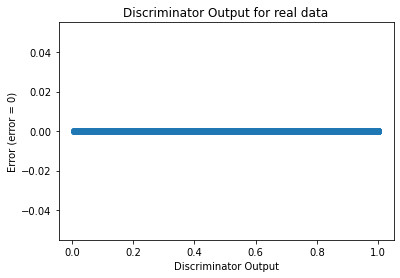

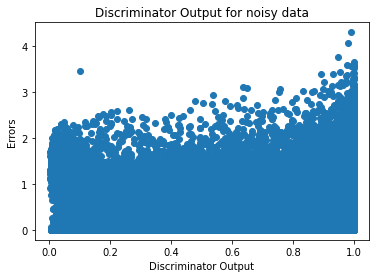

In [13]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [14]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5355]], device='cuda:0', requires_grad=True)
